# Project 3: Numerical Derivatives and Taylor Series Approximations

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 90px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 25px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.5, Friday, Oct 4, 2024.*

## Overview:

Numerical derivatives are required to solve differential equations in numerical modelling and they can also be applied to data. To understand its intricacies, the three derivative approximations will be applied using the ice thickness data of the Nenana River.

Taylor Series Expansions are necessary to understand the limitations of numerical models based on finite differences/finite elements. In particular, the approximation of derivatives/integrals and its effect on representing physical systems. In the majority of cases, we use Taylor as an approximation of non-linear functions that do not have mathematically simple solutions and instead use a polynomial to locally approximate. However, it is crucial to understand that the result is **only accurate over a small interval**. For this project, we will look at a simple function that we can solve analytically and compare with our Taylor approximations. 

<div style="background-color:#facb8e; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>Note on programming implementation: one goal of this assignment is for you to be aware of how the numerical implementation differs from the analytic expressions, as well as how the implementation differs between numerical schemes. Typically this is straightforward for the calculations in general, but special consideration must be made when evaluating equations at the edges of the data set (or function domain). In 1D problems, this means the first and last points.</p></div>

<div style="background-color:#facb8e; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>Note also that we use Pandas in this notebook to make the data handling easier. You are not expected to be able to use it (yet), but now that you are an expert with Python dictionaries, you will probably be able to recognize what it is doing easily.</p></div>

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

## Part 0: Data Import and Exploration

In the following, the ice thickness [cm] data of the Nenana River is plotted over time, and we are interested in the derivative of ice thickness.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>


<b>Task 0.1:</b> run the cell below to create a plot, then reflect on this question: what does the time derivative represent?  


</ol>
</p>
</div>

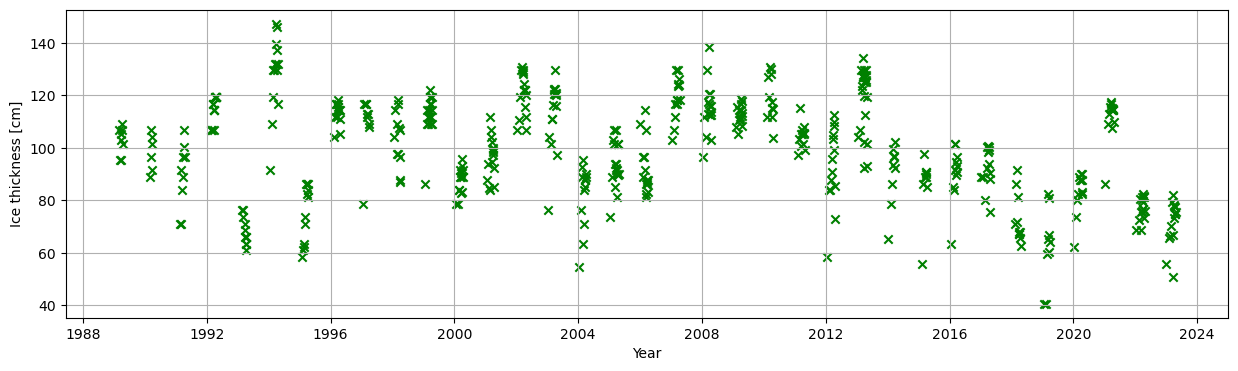

In [2]:
data=pd.read_csv(filepath_or_buffer='justIce.csv',index_col=0)
data.index = pd.to_datetime(data.index, format="%Y-%m-%d")

plt.figure(figsize=(15,4))
plt.scatter(data.index,data, color='green', marker='x')
plt.xlabel('Year')
plt.ylabel('Ice thickness [cm]')
plt.grid()

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 0.2:</b> Before computing the numerical derivatives, reflect on why it would be a bad idea to do it over the entire data set? In other words, why is it a bad idea to compute the derivatives over the entire nearly 40-year period?
</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 0.3:</b> Run the cell below to visualize what the data looks like for one year. Reflect on whether this is a suitable time period over which to compute derivatives.
</p>
</div>

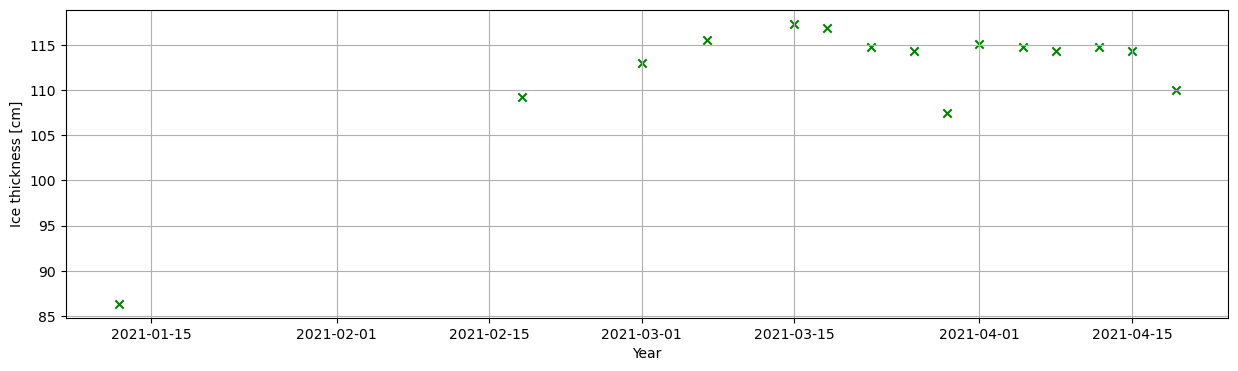

In [3]:
data_2021 = data.loc['2021']

plt.figure(figsize=(15,4))
plt.scatter(data_2021.index,data_2021, color='green', marker='x')
plt.xlabel('Date')
plt.ylabel('Ice thickness [cm]')
plt.grid()


## Part 1: Numerical Derivatives

For numerics we will use numpy due to its optimization for numerical computations. In the cell below, the conversion to numpy is already there as well as a transformation from date to time_days.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 1.1:</b>  Use Forward Difference to estimate the growth rate of the ice, using <em>only</em> the variables <code>h_ice</code> and <code>t_days</code> (i.e., no need to write a function).

</ol>
</p>
</div>

<div style="background-color:#facb8e; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>Remember that one of our goals is to compare the numerical implementation, therefore, in the Tasks below you are asked to keep the function evaluations identical in each case, while <em>only</em> changing the evaluation points (i.e., the indices of the time array).</p></div>

In [47]:
h_ice = (data_2021.to_numpy()).ravel()
t_days = ((data_2021.index - data_2021.index[0]).days).to_numpy()

dh_dt_FD = YOUR_CODE_HERE

Great, you did it! However, computing the derivative is not enough. It is necessary to specify **where** that derivative was computed.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 1.2:</b> Plot the growth rate together with the ice thickness, specifying the proper time where the derivative is computed.

<em>Note that a second axis has been added to enable us to include the original ice thickness measurements for comparison.</em>

</p>
</div>

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,4))

ax1.scatter(YOUR_CODE_HERE, dh_dt_FD,
            color='blue', marker='o', label='dh_dt_FD Forward Difference')\

ax1.set_xlabel('Days')
ax1.set_ylabel('Growth Rate [cm/day]', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()


ax2 = ax1.twinx()
ax2.scatter(t_days, h_ice,
            color='green', marker='x', label='h_ice Measurements')
ax2.set_ylabel('Ice thickness [cm]', color='green')
ax2.tick_params(axis='y', labelcolor='green')

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles + handles2, labels + labels2, loc='upper left')

plt.show()


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 1.3:</b> Use backward difference to compute the ice growth rate and plot it, together with the previous estimation and the ice thickness.

</p>
</div>

In [ ]:
dh_dt_BD = YOUR_CODE_HERE

fig, ax1 = plt.subplots(figsize=(15,4))

ax1.scatter(YOUR_CODE_HERE, dh_dt_FD,
            color='blue', marker='o', label='dh_dt_FD Forward Difference')
ax1.scatter(YOUR_CODE_HERE, dh_dt_BD,
            color='red', marker='o', label='dh_dt_BD Backward Difference')

ax1.set_xlabel('Days')
ax1.set_ylabel('Growth Rate [cm/day]', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

ax2 = ax1.twinx()
ax2.scatter(t_days, h_ice,
            color='green', marker='x', label='h_ice Measurements')
ax2.set_ylabel('Ice thickness [cm]', color='green')
ax2.tick_params(axis='y', labelcolor='green')

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles + handles2, labels + labels2, loc='upper left')

plt.show()

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 1.4:</b> Now apply central differences and plot them. 

**Beware: if you follow the derivation in the textbook, the distances $x_{i+1}-x_i$ and $x_{i}-x_{i-1}$ are assumed to be the same for all points (and between $x_{i-1}$, $x_i$ and $x_{i+1}$). That is not the case in this data set. Therefore, you must evaluate the derivative at some location between each data point that satisfies this criteria.** (Hint: the middle!). 

<em>Note that it is not necessary to define the "new" points that the derivative is evaluated at, you can write them directly in the scatter plot arguments.</em>
</p>
</div>

In [ ]:
dh_dt_CD = YOUR_CODE_HERE

fig, ax1 = plt.subplots(figsize=(15,4))

ax1.scatter(YOUR_CODE_HERE, dh_dt_FD,
            color='blue', marker='o', label='dh_dt_FD Forward Difference')
ax1.scatter(YOUR_CODE_HERE, dh_dt_BD,
            color='red', marker='o', label='dh_dt_BE Backward Difference')
ax1.scatter(YOUR_CODE_HERE, dh_dt_CD,
            color='purple', marker='o', label='dh_dt_CD Central Difference')

ax1.set_xlabel('Days')
ax1.set_ylabel('Growth Rate [cm/day]', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

ax2 = ax1.twinx()
ax2.scatter(t_days, h_ice, color='green', marker='x', label='h_ice Measurements')
ax2.set_ylabel('Ice thickness [cm]', color='green')
ax2.tick_params(axis='y', labelcolor='green')

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles + handles2, labels + labels2, loc='upper left')

plt.show()

## Part 2: Taylor Series 

### Definition

Recall that the Taylor series for one variable as previously described in the fundamentals section of the MUDE textbook as

$$
f(x)\approx f(x_0)+(x-x_0)\frac{\partial f(x_0)}{\partial x}+\frac{(x-x_0)^2}{2!}\frac{\partial^2 f(x_0)}{\partial x^2}+...+\frac{(x-x_0)^n}{n!}\frac{\partial^n f(x_0)}{\partial x^n}
$$

This may also be written as a summation, which may help to visualize the process of writing the terms of the Taylor approximation. The Taylor approximation as a summation becomes 

$$
f(x) \approx \sum_{n=0}^{\infty} \frac{(x-x_0)^n}{n!} f^{(n)}(x_0)
$$

where $f^{(n)}(x_0)$ indicates the $n$-th derivative of a function $f(x)$ evaluated at $x=x_0$.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.0:</b> Write the derivation of the backward difference second order accurate! Insert an image of your math below. 

(You **don't** have to use this formula later on)
</p>
</div>

_You will be asked to include your derivation in the Report, but you can also include it here._

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>We don't care if you use AI tools for derivations, but remember: <b>deriving equations in this way will be necessary to complete exam questions, so you really should practice doing it by hand!</b></p></div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.1:</b> Derive the Taylor series expansion terms:

<u>On paper</u>, obtain the <b>first four</b> derivatives for the expression: 
$$
f(x)= 2\cos(x)+\sin(x) 
$$ 

Once you obtain the expressions, evaluate them around the point $x_0=\pi$.

These terms will be used later to assess the effects of using more or less terms in the approximation as well as the distance from $x_0$ later on in the notebook.

Use the following markdown cell to include your derivation of the Taylor series terms.

</ol>
</p>
</div>

_You will be asked to include your derivation in the Report, but you can also include it here._

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.2:</b> Plotting reference expression and approximations.

Before continuing with TSE, plot the expression $f(x)=2\cos(x)+\sin(x)$ in the interval $[-3\pi,5\pi]$. This will be used as benchmark to assess your approximations. We will want to produce plots that will include each successive term of the Taylor approximation to see how the approximation improves as we include more terms in the Taylor series. 

</p>
</div>


In [ ]:
x = np.linspace(-3*np.pi, 5*np.pi, 400)

def f(x):
    return YOUR_CODE_HERE

plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE, color='b', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Plot of $f(x) = 2cos(x) + sin(x)$");

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.3:</b> Putting pen to python.

Enter the first four derivative terms in the corresponding functions below so that we can use them in our approximation.

Complete the functions in the code cell below, `f_#` refers to the <b>derivatives</b> of each portion of the function.

</p>
</div>


In [36]:
def f_1(x):
    return YOUR_CODE_HERE

def f_2(x):
    return YOUR_CODE_HERE

def f_3(x):
    return YOUR_CODE_HERE

def f_4(x):
    return YOUR_CODE_HERE

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.4:</b> Define the expansion point and write the Taylor series expansion of first, second, third and fourth order. 

Complete the functions in the code cell below, the `taylor_#` refers to the order of the Taylor approximation and <code>x0</code> the expansion point, using our previously defined $x_0$..

</p>
</div>


In [39]:
x0 = YOUR_CODE_HERE
taylor_1 = YOUR_CODE_HERE
taylor_2 = YOUR_CODE_HERE
taylor_3 = YOUR_CODE_HERE
taylor_4 = YOUR_CODE_HERE

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.5:</b> Plot your function along with your Taylor orders to illustrate the local approximations of the inclusions of each extra term.  



</p>
</div>


In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE,
         label='$f(x) = 2cos(x) + sin(x)$', color='b', linewidth=2)
plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE,
         label='First Order', linestyle='--', color='g', linewidth=2)
plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE,
         label='Second Order', linestyle='--', color='r', linewidth=2)
plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE,
         label='Third Order', linestyle='--', color='m', linewidth=2)
plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE,
         label='Fourth Order', linestyle='--', color='y', linewidth=2)


plt.scatter([x0], [f(x0)],
            color='k', marker='o', label=f'Expansion Point ($x = {x0:0.3f}$)')

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.title('Taylor Series Expansion of $f(x) = 2cos(x) + sin(x)$')
plt.legend()
plt.xlim(-1,9)
plt.ylim(-10,10)

plt.grid(True)
plt.show();

### Estimating the Truncation error 

When we use Taylor series approximations of a function, we truncate the infinite series to a specfic number of terms. Thus, a truncation error is introduced. A simple error metric between the analytical solution and the numerical approximation of our function can be found by computing the absolute value of the difference between the function and the approximation, namely
$$
\text{error }=|f(x)-T_n|
$$
where $T_n$ refers to the TSE computed using $n$ number of terms (or derivatives) of the Taylor series we use.


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">

<p><b>Task 2.6:</b> Use your Taylor series approximations and the analytic solution to determine their absolute error. Plot these approximations and vary the x and y limits. Are the larger orders TSE always better?
</p>
</div>

In [ ]:
error_1 = YOUR_CODE_HERE
error_2 = YOUR_CODE_HERE
error_3 = YOUR_CODE_HERE
error_4 = YOUR_CODE_HERE

plt.figure(figsize=(10, 4))
plt.plot(x, error_1,
         label='First Order', color='g', linewidth=2)
plt.plot(x, error_2,
         label='Second Order', color='r', linewidth=2)
plt.plot(x, error_3,
         label='Third Order', color='m', linewidth=2)
plt.plot(x, error_4,
         label='Fourth Order', color='y', linewidth=2)

plt.xlabel('x')
plt.ylabel('Absolute Error: $f(x)$-Taylor Order')
plt.title('Absolute Error of Taylor Series Approximations')
plt.xlim(np.pi-1,np.pi+1)
plt.ylim(0,0.01)
plt.legend()

plt.grid(True)
plt.show();

## Part 3: Taylor Series Expansion in Two Variables

Let's investigate how the Taylor Series Expansion operates in two dimensions. Expanding a function dependent on two variables, $f(x, y)$, can be expressed as:

$$
f(x, y) \approx f(x_0, y_0) + (x - x_0)\frac{\partial f}{\partial x}\bigg|_{(x_0, y_0)}  + (y - y_0) \frac{\partial f}{\partial y}\bigg|_{(x_0, y_0)} \\ 
+ \frac{(x - x_0)^2}{2!}\frac{\partial^2 f}{\partial x^2}\bigg|_{(x_0, y_0)} + \frac{(y - y_0)^2}{2!}\frac{\partial^2 f}{\partial y^2}\bigg|_{(x_0, y_0)} \\
+ (x - x_0)(y - y_0)\frac{\partial^2 f}{\partial x \partial y}\bigg|_{(x_0, y_0)} + \ldots
$$

The terms in this summation are determined by the partial derivatives of $f$ with respect to $x$ and $y$ evaluated at $(x_0, y_0)$. The expansion includes an infinite series of terms, starting from the first-order terms and continuing to higher-order terms as $n$ increases. The choice of how many terms to include in the expansion depends on the desired level of accuracy.


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b> Writing out the expansion. 

Using the function $f(x,y)=\sin(2x)+\cos(y)$ derive the first and second derivatives of the approximation. Do this <u>on paper</u>, as before. After obtaining derivatives, evaluate them around the expanding point $(x_0=\pi,y_0=\pi)$. Also, add the evaluation of $f(x_0,y_0)$.

Use the following cell to include your workings for the solution. 
</ol>
</p>
</div>


_You will be asked to include your derivation in the Report, but you can also include it here._


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.2:</b> Transfer the Taylor Approximation

Enter the expansion point and include the Taylor approximation in the function definition of the code cell below.

<em>Remember, to break a line in the code and keep it readable you can surround the expression with an extra set of parentheses, <code>(  )</code>; this will allow arbitrarily-placed line breaks within the code.</em>
</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>Note that here we define <code>x0</code> and <code>y0</code> as global variables (outside the function). This is a bad practice in general, but in this case it is OK because we are limiting our use of the code to a few small functions and tasks in a single notebook.</p></div>

In [44]:
def f2D(x, y):
    return YOUR_CODE_HERE

x0 = YOUR_CODE_HERE
y0 = YOUR_CODE_HERE

def taylor2D(x, y):
    return (YOUR_CODE_HERE)

### Visualize Results

Let's plot a 3D surface plot of the results and try to visualize the intersection of the function and its Taylor approximation. In order to do this, we need to create a <code>meshgrid</code> over the region of interest (this is done with `np.meshgrid`). Using our <code>def</code> functions above we can determine the surface.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.3:</b> Scrutinize the code to understand what is being plotted, then run it to visualize the results.
</p>
</div>

In [ ]:
# Create a meshgrid of x and y values
x = np.linspace(-2+x0, 2+x0, 100)
y = np.linspace(-2+y0, 2+y0, 100)
X, Y = np.meshgrid(x, y)

# Calculate the original function values and the approximation
Z_orig = f2D(X, Y)
Z_approx = taylor2D(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_orig, rstride=1, cstride=1, cmap='Reds',
                label='Original Function')
ax.plot_surface(X, Y, Z_approx, rstride=1, cstride=1, cmap='Blues',
                alpha=0.7, label='Taylor Approximation')

# Set labels and legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.legend()

# Show the plot
plt.title('Original Function vs. Taylor Approximation')
plt.show()


### Error Analysis

How good is this approximation?

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.4:</b> Use the following cell to calculate the absolute error between the analytical and Taylor approximation  as previously and plot the results.
</p>
</div>

In [ ]:
error_2d = YOUR_CODE_HERE

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, error_2d, cmap='Reds', label='Absolute Error')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Absolute Error')
plt.title('Absolute Error between $f(x, y)$ and Taylor Approximation')
plt.show()


**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->